# Actividad NLP - 1.0 - Creación de Diccionario
## *Tania Sayuri Guizado Hernandez - a01640992*



In [ ]:
# Importamos las librerias necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import re
from collections import Counter

#### El objetivo es realizar un conteo de las palabras de un texto, el archivo de entrada puede ser de cualquier formato, pero debe de entregar un histograma del mismo.

In [ ]:
# Descargamos el libro de Orgullo y Prejuicio
url = "https://www.gutenberg.org/cache/epub/1342/pg1342.txt"
# Hacemos la peticion al servidor
response = requests.get(url)

# Verificamos que la peticion haya sido exitosa
if response.status_code == 200:
    book = response.text


In [ ]:
# Función para contar las palabras
def count_words(textt):
    words = re.findall(r'\b\w+\b', textt.lower())
    counterWords = Counter(words)
    return counterWords

# Se llama a la función para contar las palabras y se guardan en una variable
totalWords = count_words(book)

# Obtenemos las palabras más comunes
commonWords = totalWords.most_common()

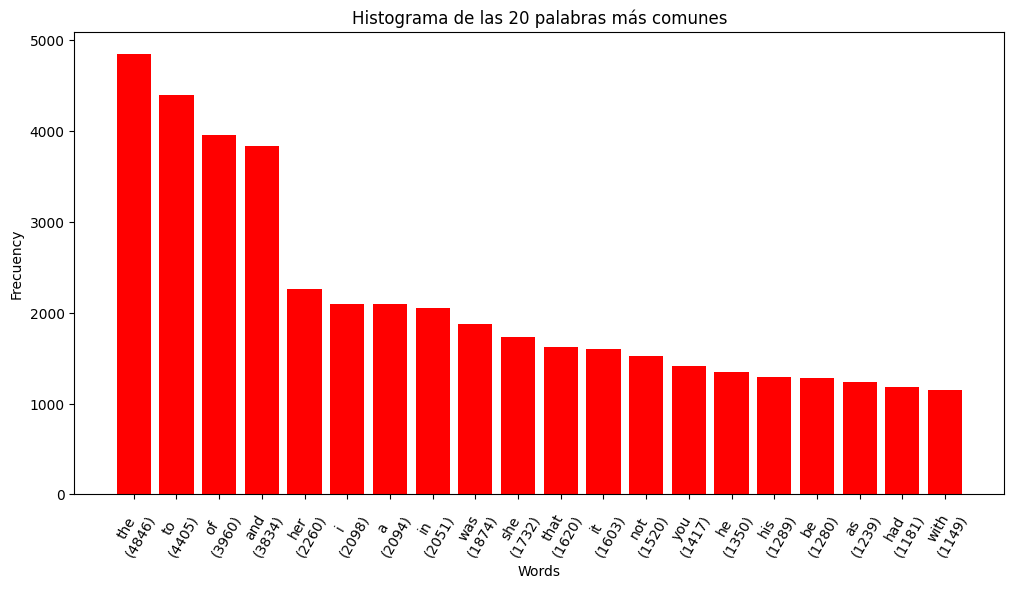

In [ ]:
top_words = commonWords[:20] # Se obtienen las 20 palabras más comunes
words, frequencies = zip(*top_words) # Se separan las palabras y las frecuencias
word_indices = range(len(words)) # Se obtienen los índices de las palabras


labels = [f'{word}\n({frequency})' for word, frequency in top_words]  # Se obtienen las etiquetas para el eje x
bar_color = 'red'

# Se crea el histograma
plt.figure(figsize=(12, 6))
plt.bar(word_indices, frequencies, tick_label=labels, color=bar_color)
plt.xlabel('Words')
plt.ylabel('Frecuency')
plt.title('Histograma de las 20 palabras más comunes')
plt.xticks(rotation=60)
plt.show()


#### Realizar una nube de palabras a partir del corpus obtenido de su base de datos de proyecto o el corpus de cualquier libro.

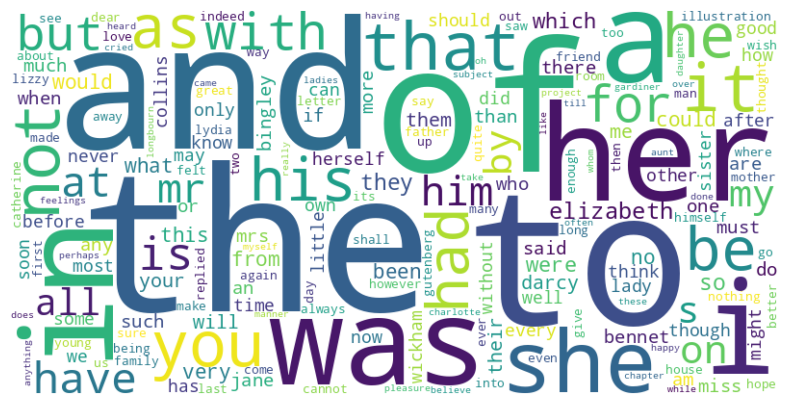

In [ ]:
word_count_dict = dict(commonWords) # Se crea un diccionario con las palabras y sus frecuencias

# Función para generar la nube de palabras
def generate_word_cloud(word_count):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_count)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_word_cloud(word_count_dict) # Se llama a la función para generar la nube de palabras

#### Creación de un diccionario de palabras.

In [ ]:
# Función para crear el diccionario de palabras
def create_dict(textt):
    words = set(re.findall(r'\b\w+\b', textt.lower()))
    return words

final_dict = create_dict(book) # Se llama a la función para crear el diccionario de palabras


#### Realizar una corrección del texto con respecto al diccionario usando cálculo de distancia de “strings”.

In [ ]:
import Levenshtein # Importamos la librería de Levenshtein
# La librería de Levenshtein nos permite calcular la distancia entre dos cadenas de texto

# Función para corregir el texto
def correct_text(texto, diccionario, umbral=2):
    words = re.findall(r'\b\w+\b', texto.lower()) # Se obtienen las palabras del texto
    corrected_txt = []

    # Se recorren las palabras del texto
    for word in words:
        best_coincidence = min(diccionario, key=lambda x: Levenshtein.distance(word, x)) # Se obtiene la palabra con menor distancia
        distancia = Levenshtein.distance(word, best_coincidence) # Se calcula la distancia entre la palabra y la mejor coincidencia
        if distancia <= umbral:
            corrected_txt.append(best_coincidence) # Se agrega la mejor coincidencia a la lista
        else:
            corrected_txt.append(word) # Se agrega la palabra original a la lista

    return " ".join(corrected_txt)

example = "exmple wuth a few errurs"
corrected = correct_text(example, final_dict)
print("Clean text:", corrected)

Clean text: example with a few errors


En esta actividad lo que logre importantes aprendizajes relacionados con técnicas de procesamiento de texto y de NLP. Gracias a su enfoque principal, se logró que con un diccionario de palabras pudiera realizar una mejorara a la calidad de textos mediante la corrección de palabras que no se encuentran en el diccionario. Esto resalta la utilidad del NLP en la corrección automática de texto. 